<span style="color:#87cefa; font-size:200%">Energy Balance Plot Code</span> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches

import os, sys
import paramiko

from netCDF4 import Dataset
import numpy as np

In [2]:
ny = 36
nx = 96
convmesh = np.load("./conv_geo_mesh_center.npy")
convmesh_x = np.load("./conv_geo_mesh_x.npy")
convmesh_y = np.load("./conv_geo_mesh_y.npy")

almesh = np.load("./al_geo_mesh_center.npy")
almesh_x = np.load("./al_geo_mesh_x.npy")
almesh_y = np.load("./al_geo_mesh_y.npy")
co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")
print(np.shape(co_facing))
print(np.shape(al_facing))
def conv_distance_center(first_point, second_point):
    x_range = x_convmeshinfo[first_point[1],first_point[0]]-x_convmeshinfo[second_point[1],second_point[0]]
    y_range = y_convmeshinfo[first_point[1],first_point[0]]-y_convmeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def conv_distance_point(first_point, second_point):
    x_range = convmesh_x[first_point[2],first_point[1],first_point[0]]-convmesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = convmesh_y[first_point[2],first_point[1],first_point[0]]-convmesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_almeshinfo[first_point[1],first_point[0]]-x_almeshinfo[second_point[1],second_point[0]]
    y_range = y_almeshinfo[first_point[1],first_point[0]]-y_almeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = almesh_x[first_point[2],first_point[1],first_point[0]]-almesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = almesh_y[first_point[2],first_point[1],first_point[0]]-almesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result



def total_pressure(ne,te,na,ti):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
    return pr

def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
dumx_convmeshinfo = convmesh[:,0]
dumy_convmeshinfo = convmesh[:,1]
x_convmeshinfo = dumx_convmeshinfo.reshape(ny+2,nx+2)
y_convmeshinfo = dumy_convmeshinfo.reshape(ny+2,nx+2)

dumx_almeshinfo = almesh[:,0]
dumy_almeshinfo = almesh[:,1]
x_almeshinfo = dumx_almeshinfo.reshape(ny+2,nx+2)
y_almeshinfo = dumy_almeshinfo.reshape(ny+2,nx+2)



#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)

conv_sep_out_target = np.zeros(2)
conv_sep_out_target[0] = convmesh_x[1,18,96]
conv_sep_out_target[1] = convmesh_y[1,18,96]

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = almesh_x[1,18,96]
al_sep_out_target[1] = almesh_y[1,18,96]
convmesh_x_cen = np.sum(convmesh_x, axis = 0)/4
convmesh_y_cen = np.sum(convmesh_y, axis = 0)/4
almesh_x_cen = np.sum(almesh_x, axis = 0)/4
almesh_y_cen = np.sum(almesh_y, axis = 0)/4
print(conv_sep_out_target)
conv_sep_out_target_dist = np.zeros(ny+2)
X_point = []
for i in range(ny+2):
    conv_sep_out_target_dist[i] = conv_distance_point([96,i,1],[96,18,1])
    if i<18:
        conv_sep_out_target_dist[i] = -conv_sep_out_target_dist[i]
    
conv_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_target_dist[i] = conv_distance_point([1,i,1],[1,18,1])
    if i<18:
        conv_sep_in_target_dist[i] = -conv_sep_in_target_dist[i]
print(conv_sep_out_target_dist)

print(al_sep_out_target)
al_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    if i<18:
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
    
al_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([1,i,1],[1,18,1])
    if i<18:
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]


        
        
conv_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_midplane_dist[i] = conv_distance_point([51,i,1],[51,18,1])
    if i<18:
        conv_sep_out_midplane_dist[i] = -conv_sep_out_midplane_dist[i]
    
conv_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_midplane_dist[i] = conv_distance_point([29,i,1],[29,18,1])
    if i<18:
        conv_sep_in_midplane_dist[i] = -conv_sep_in_midplane_dist[i]


al_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    if i<18:
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
    
al_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_midplane_dist[i] = al_distance_point([29,i,1],[29,18,1])
    if i<18:
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]

    
conv_Xpt_dist = np.zeros(20)
for i in range(20):
    conv_Xpt_dist[i] = conv_distance_center([78,18],[78+i,18])

    
    
al_Xpt_dist = np.zeros(20)
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)






(3, 38, 98)
(3, 38, 98)
[ 1.46925157 -1.29399156]
[-0.0715723  -0.07152744 -0.06704153 -0.06229474 -0.05731827 -0.05215115
 -0.04692141 -0.04169072 -0.03650874 -0.03143631 -0.02655407 -0.02190946
 -0.01750687 -0.01347613 -0.00982187 -0.00661739 -0.00386102 -0.00163475
  0.          0.00099463  0.00205597  0.00379204  0.00621517  0.00931366
  0.01314076  0.0176591   0.02284651  0.02871627  0.03528336  0.04247052
  0.0503574   0.05881249  0.06791765  0.07758154  0.08785052  0.09866668
  0.10996054  0.12180333]
[ 1.49532367 -1.39853962]
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


<span style="color:#87cefa; font-size:150%">Data reading</span> 

In [3]:
condition = "con_Ne_0"

def datfile_read(name):
    with open('./../output_new/output_%s/%s.dat' %(condition,name),'r') as f:
        raw_data = f.readlines()
        
    sp_raw_data =  raw_data[0].split()
    for row in range(1, len(raw_data)):
        dummy_array= np.array(raw_data[row].split())
        sp_raw_data = np.vstack([sp_raw_data, dummy_array[1:]])
    sp_raw_data = sp_raw_data[1:,:]
    sp_raw_data = sp_raw_data.astype('float64')
    return(sp_raw_data)

def makeitfloat(filename):
    a = filename.astype(np.float64)
    return a

In [4]:
def heat_flux(valname):
    total_heat_loc = 1
    fht_local = valname

    heat_outer_diver = np.sum((fht_local[1,1:,96]))/total_heat_loc+np.sum((fht_local[0,1:,96]))/total_heat_loc

    heat_inner_diver = np.sum((fht_local[1,1:,1]))/total_heat_loc+np.sum((fht_local[0,1:,1]))/total_heat_loc

    heat_PRF = (np.sum((fht_local[1,1,77:]))+np.sum((fht_local[1,1,:11])))/total_heat_loc

    sol_heat = (np.sum(fht_local[0,37,:])+np.sum(fht_local[1,37,:]))/total_heat_loc

    core_heat = (np.sum((fht_local[0,0,11:77]))+np.sum((fht_local[1,0,11:77])))/total_heat_loc

    return heat_outer_diver,-heat_inner_diver,heat_PRF,sol_heat,-core_heat



<span style="color:#87cefa; font-size:150%">List of the file names and corresponding paths</span> 

<span style="color:#87cefa; font-size:100%">"Numbered" values</span> 

In [5]:
value_list = list()

#value_list.append("b2npmo_resmo")
#value_list.append("b2stbr_smo_eir")
valuename = list()

for j in range(len(value_list)):
    list_first_part = value_list[j]
    for i in range(20):
        if i<10:
            valuename.append("%s00%i" %(list_first_part, i))
        else:
            valuename.append("%s0%i" %(list_first_part, i))

for to in range(len(valuename)):
    if "eir" in valuename[to] and "000" in valuename[to]:
        valuename[to]=0
    elif "eir" in valuename[to] and "002" in valuename[to]:
        valuename[to]=0
    elif "eir" in valuename[to] and "009" in valuename[to]:
        valuename[to]=0

remove_set = {0}

valuename = [i for i in valuename if i not in remove_set]
print(valuename)

for k in range(len(valuename)):
    globals()['%s' %valuename[k]] = list()
    
print(valuename)




[]
[]


<span style="color:#87cefa; font-size:100%">"Unumbered" values</span> 

In [6]:
un_valuename = list()

un_valuename.append("b2npht_she")
un_valuename.append("b2sihs__shedu")



un_valuename.append("b2npht_shi")
un_valuename.append("b2stbr_shi_eir")
un_valuename.append("b2sihs__shidu")

un_valuename.append("b2npht_shei")




In [7]:
total_valuename = valuename+un_valuename
print(total_valuename)

['b2npht_she', 'b2sihs__shedu', 'b2npht_shi', 'b2stbr_shi_eir', 'b2sihs__shidu', 'b2npht_shei']


<span style="color:#87cefa; font-size:150%">scp part</span> 

In [8]:
#dPfname_list = total_valuename
#fpath_list = list()
#base_list  = list()
#base_list.append("Con_noNe")
#fpath_list.append("/home/chanyeong/solps-iter/runs/conventionalgeo_no_neon/Baseline_KSTAR/output/")




#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy)
#ssh.connect("143.248.99.71",username="chanyeong",password="")
#sftp = ssh.open_sftp()


#for base_num in range(len(base_list)):
#    now_base = base_list[base_num]
#    for path_num in range(len(fpath_list)):
#        now_path = fpath_list[path_num]
#        for name_len in range(len(total_valuename)):
#            try:
#                file = sftp.get('%s%s.dat'%(now_path,fname_list[name_len]), './../output_new/%s_%s.txt' %(now_base, total_valuename[name_len]))
#            except FileNotFoundError as e:
#                print('%s%s.dat'%(now_path,fname_list[name_len]))
#                print(total_valuename)
#                print(fname_list)
#ssh.close()



In [9]:
sink_e = datfile_read("b2npht_she")
sink_i = datfile_read("b2npht_shi")
resi_e = datfile_read("b2npht_reshe")
resi_i = datfile_read("b2npht_reshi")

ano_e = datfile_read("b2sihs__shedu")
ano_i = datfile_read("b2sihs__shidu")

vol = datfile_read("vol")
#fhe = np.load("%s/fhe_b2fplasmf_new_mesh_al_Ne_0.npy" %dir_location)
#fhi = np.load("%s/fhi_b2fplasmf_new_mesh_al_Ne_0.npy"  %dir_location)

fhe_out = np.stack([datfile_read("b2npht_fhex"),datfile_read("b2npht_fhey")])
fhi_out = np.stack([datfile_read("b2npht_fhix"),datfile_read("b2npht_fhiy")])


In [10]:
new_fhe_out = np.zeros([2, 38,98])
new_fhi_out = np.zeros([2, 38,98])


for i in range(38):
    new_fhe_out[:,i,:] = fhe_out[:,37-i,:]
    new_fhi_out[:,i,:] = fhi_out[:,37-i,:]



In [11]:
print(np.sum(datfile_read("b2sihs__shefr")))



74.91357266640432


In [12]:
sink_e_sum = np.sum(datfile_read("b2npht_she"))
sink_i_sum = np.sum(datfile_read("b2npht_shi"))
resi_e_sum = np.sum(datfile_read("b2npht_reshe"))
resi_i_sum = np.sum(datfile_read("b2npht_reshi"))
ano_e_sum = np.sum(datfile_read("b2sihs__shedu"))
ano_i_sum = np.sum(datfile_read("b2sihs__shidu"))
vol = datfile_read("vol")

In [13]:
#fhe_sum = np.sum(heat_flux(fhe))
#fhi_sum = np.sum(heat_flux(fhi))


fhe_out_sum = np.sum(heat_flux(new_fhe_out))
fhi_out_sum = np.sum(heat_flux(new_fhi_out))

e_eir = np.sum(datfile_read("b2stbr_she_eir"))
i_eir = np.sum(datfile_read("b2stbr_shi_eir"))


loss_rad = np.sum(datfile_read("b2stel_she_rad"))

#these two terms are negligible
loss_ion = np.sum(datfile_read("b2stel_shi_ion"))
loss_rec = np.sum(datfile_read("b2stel_shi_rec"))


vis = np.sum(datfile_read("b2sihs__shivc"))+np.sum(datfile_read("b2sihs__shiva"))

fht = np.load("./../output_new/output_%s/fht_b2fplasmf_%s.npy" %(condition, condition))


e_friction = np.sum(datfile_read("b2sihs__shefr"))
ion_friction = np.sum(datfile_read("b2sihs__shifr"))

fri =e_friction-ion_friction


fht_plz = heat_flux(fht)

In [14]:
#np.sum(datfile_read("b2sihs__shivc"))
np.sum(datfile_read("b2sihs__shiva"))

2838.871260047097

In [15]:
co = -np.sum(datfile_read("b2sihs__shidu"))+ np.sum(datfile_read("b2sihs__shedu"))

In [16]:
print(fht_plz)

(429453.4933470227, 347489.5804725783, -1544.043854144737, 358648.259302195, 61401.58043016137)


In [17]:
print(fhe_out_sum+fhi_out_sum, e_eir,i_eir,loss_rad,vis)

2263192.627035048 -15840.297431027197 -13786.508641832317 -818131.730192 43645503.70072596


In [18]:
(fhe_out_sum+fhi_out_sum-e_eir-i_eir-loss_rad)/2500000

1.244380465319963

In [19]:
(np.sum(fht_plz)-e_eir-i_eir-loss_rad)/2500000

0.8172829623850689

In [20]:
print(fri/2500000)

-0.0027620286561302024


In [21]:
print(np.sum(datfile_read("b2npht_reshe"))/2500000)
print(np.sum(datfile_read("b2npht_reshi"))/2500000)

-2.344356385244
16.77979098281882


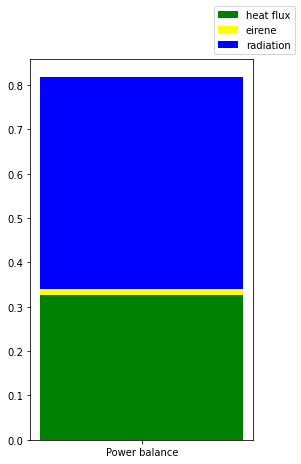

In [22]:
data1=[(np.sum(fht_plz))/2500000]
data2=[(-e_eir-i_eir)/2500000]
data3=[-loss_rad/2500000]

year=["Power balance"]
plt.figure(figsize=(4,7))
plt.bar(year,data3,color="green",label="heat flux")
plt.bar(year,data2,color="yellow",bottom=data3,label="eirene")
plt.bar(year,data1,color="blue",bottom=[sum(data) for data in zip(data2,data3)],label="radiation")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [23]:
print(heat_flux(new_fhi_out))
print(heat_flux(new_fhe_out))

(375336.60793157003, 621623.4657701001, -4860.415689288652, 113210.31504500017, -0.0)
(384973.6024906501, 656647.8189486901, -5335.984213999999, 121597.12619555001, 0.0905567758)


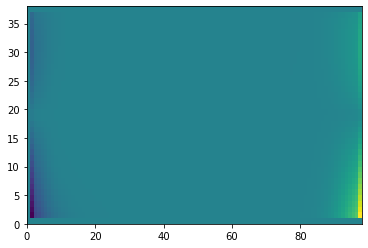

In [24]:
plt.pcolormesh(fhi_out[0,:,:])

In [25]:
fhe_out[0,:,:]-datfile_read("b2npht_fhex")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<span style="color:#87cefa; font-size:250%">Balance Calculation</span> 

<span style="color:#87cefa; font-size:190%">Energy Balance</span> 

NameError: name 'ion' is not defined

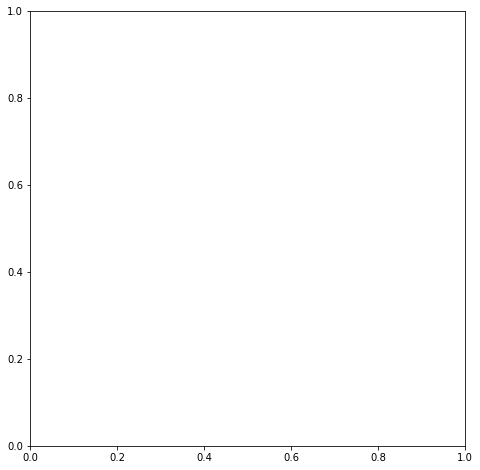

In [26]:
plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal')
plt.pcolormesh(convmesh_x_cen,convmesh_y_cen, ion)
plt.colorbar()

In [ ]:
print(ion)

In [ ]:
print(np.shape(vol))
print(np.shape(ion))

In [ ]:
vol = datfile_read("vol")

ion = datfile_read("b2npht_shi")
ion1 = datfile_read("b2sihs__shidu")
ion2 = datfile_read("b2stbr_shi_eir")



electron = datfile_read("b2npht_she")
electron1 = datfile_read("b2sihs__shedu")


i_e = datfile_read("b2npht_shei")

In [ ]:
(np.sum(ion)-np.sum(datfile_read("b2sihs__shedu"))-np.sum(electron)+np.sum(datfile_read("b2sihs__shedd")))/1000000



In [ ]:
print(np.sum(datfile_read("b2tfhe__qe_32y"))+np.sum(datfile_read("b2tfhe__qe_32x")))



In [ ]:
print(0.5*np.sum(datfile_read("b2sihs__shidu")))
print(np.sum(datfile_read("b2stel_rqrad000")
             +datfile_read("b2stel_rqrad001")
             +datfile_read("b2stel_rqrad002")
             +datfile_read("b2stel_rqrad003")
             +datfile_read("b2stel_rqrad004")
             +datfile_read("b2stel_rqrad005")
             +datfile_read("b2stel_rqrad006")
             +datfile_read("b2stel_rqrad007")
             +datfile_read("b2stel_rqrad008")
             +datfile_read("b2stel_rqrad009")
             +datfile_read("b2stel_rqrad010")
             +datfile_read("b2stel_rqrad011")
             +datfile_read("b2stel_rqrad012")
             +datfile_read("b2stel_rqrad013")
             +datfile_read("b2stel_rqrad014")
             +datfile_read("b2stel_rqrad015")
             +datfile_read("b2stel_rqrad016")
             +datfile_read("b2stel_rqrad017")
             +datfile_read("b2stel_rqrad018")
             +datfile_read("b2stel_rqrad019"))/1000000)


In [ ]:
source = np.sum(ion)+ np.sum(electron)
print(source)

In [ ]:
print("electron = ", np.sum(b2npht_she))
print("ion = ", np.sum(b2npht_shi))

In [ ]:
qe32x = datfile_read("b2tfhe__qe_32x")*hx/vol
b2fhe = np.load("./../fhe_b2fplasmf_co_KSTAR_noNe.npy")

In [ ]:
print((np.sum(vis1)+np.sum(vis2))/1000000)

In [ ]:
print(qe32x-b2fhe[0,:,:])